<a href="https://colab.research.google.com/github/tsyrulb/predictive-personal-entropy-analyzer/blob/main/ppea_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **Download Data From Kaggle**

In [ ]:
from google.colab import files

# Prompt to upload kaggle.json
print("Please upload your kaggle.json file")
uploaded = files.upload()

Please upload your kaggle.json file


Saving kaggle.json to kaggle.json


In [ ]:
# Create .kaggle directory
!mkdir -p ~/.kaggle

# Copy uploaded file to Kaggle credentials location
!cp kaggle.json ~/.kaggle/kaggle.json

# Set proper permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
def download_kaggle_dataset(dataset_path, download_path):
    """
    Download a specific Kaggle dataset

    Args:
        dataset_path (str): Kaggle dataset path (username/dataset-name)
        download_path (str): Local path to download dataset
    """
    import os

    # Create download directory
    os.makedirs(download_path, exist_ok=True)

    # Change to download directory
    os.chdir(download_path)

    # Download dataset
    !kaggle datasets download -d {dataset_path}

    # Unzip the downloaded file
    !unzip *.zip

    print(f"Dataset {dataset_path} downloaded to {download_path}")

# Download Mental Health in Tech Survey dataset
download_kaggle_dataset('osmi/mental-health-in-tech-survey', '/content/mental_health_dataset')

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey
License(s): CC-BY-SA-4.0
Archive:  mental-health-in-tech-survey.zip
  inflating: survey.csv              
Dataset osmi/mental-health-in-tech-survey downloaded to /content/mental_health_dataset


In [ ]:
# List contents of the download directory
!ls /content/mental_health_dataset

mental-health-in-tech-survey.zip  survey.csv


**Using** **Data**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/mental_health_dataset/survey.csv')

# Basic dataset information
print("Dataset Overview:")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

Dataset Overview:
Total rows: 1259
Total columns: 27


In [ ]:
# Display column names and data types
print("\nColumns and Data Types:")
print(df.info())


Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-nu

In [ ]:
# Check missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values:
state              515
self_employed       18
work_interfere     264
comments          1095
dtype: int64


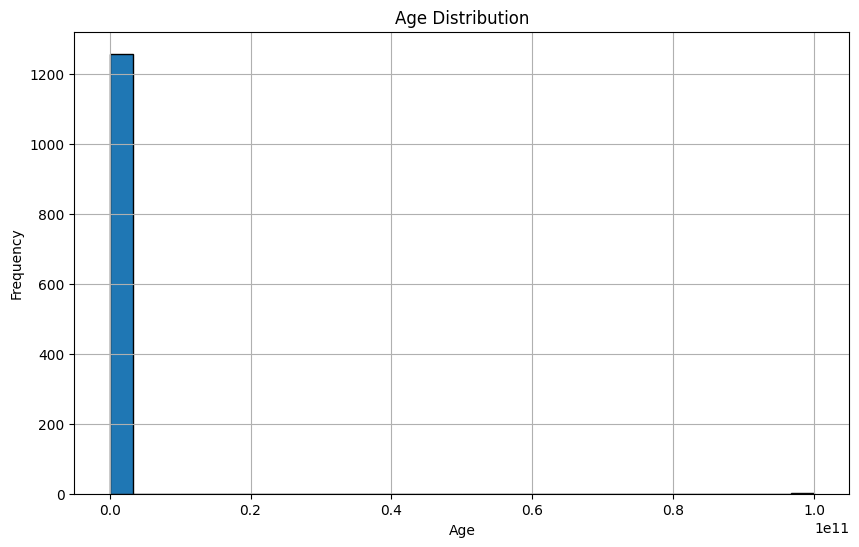

In [ ]:
plt.figure(figsize=(10, 6))
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

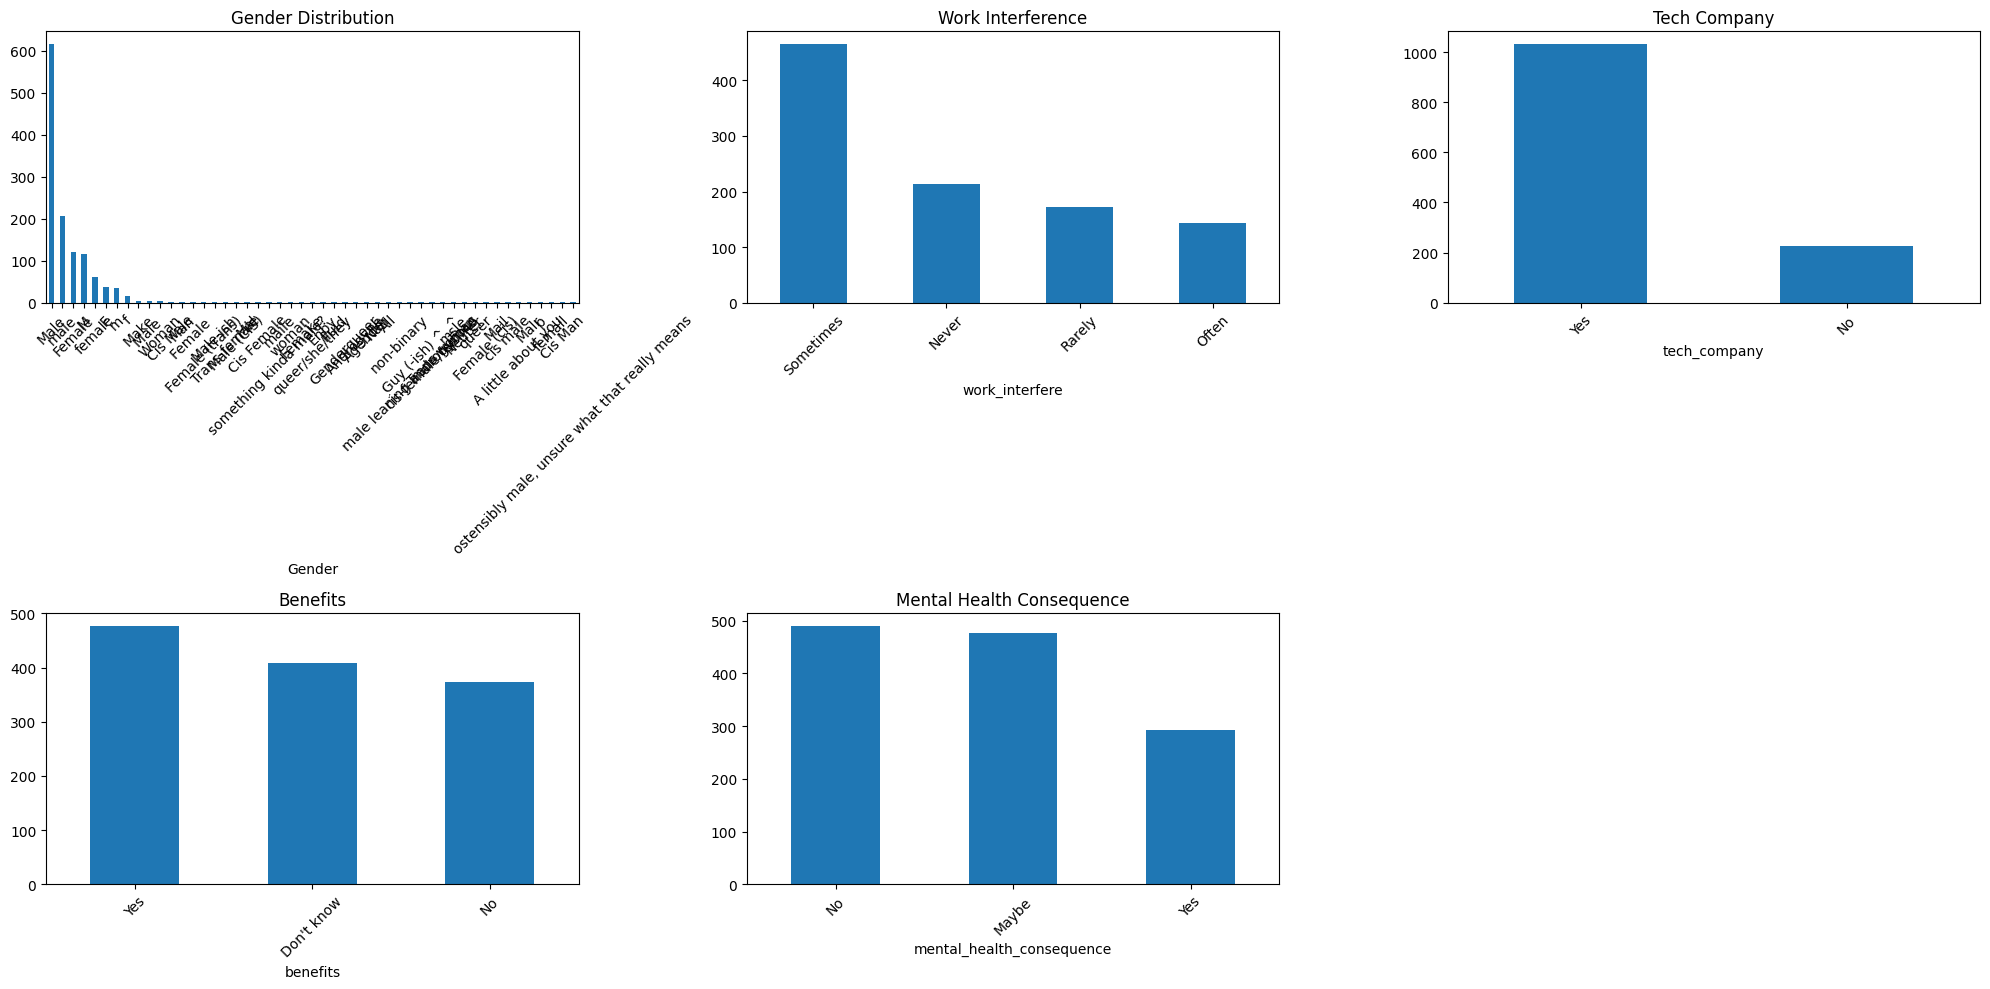

In [ ]:
# Create a subplot grid
plt.figure(figsize=(20, 10))

# Gender Distribution
plt.subplot(2, 3, 1)
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xticks(rotation=45)

# Work Interference
plt.subplot(2, 3, 2)
df['work_interfere'].value_counts().plot(kind='bar')
plt.title('Work Interference')
plt.xticks(rotation=45)

# Tech Company
plt.subplot(2, 3, 3)
df['tech_company'].value_counts().plot(kind='bar')
plt.title('Tech Company')
plt.xticks(rotation=45)

# Benefits
plt.subplot(2, 3, 4)
df['benefits'].value_counts().plot(kind='bar')
plt.title('Benefits')
plt.xticks(rotation=45)

# Mental Health Consequence
plt.subplot(2, 3, 5)
df['mental_health_consequence'].value_counts().plot(kind='bar')
plt.title('Mental Health Consequence')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
def preprocess_dataset(df):
    # Create a copy of the dataframe
    processed_df = df.copy()

    # Handle categorical variables
    categorical_columns = processed_df.select_dtypes(include=['object']).columns
    label_encoder = LabelEncoder()

    for col in categorical_columns:
        # Skip Timestamp and comments columns
        if col not in ['Timestamp', 'comments']:
            processed_df[col] = label_encoder.fit_transform(processed_df[col].astype(str))

    # Handle missing values
    # For work_interfere, fill with mode (most frequent value)
    processed_df['work_interfere'].fillna(processed_df['work_interfere'].mode()[0], inplace=True)

    # For state, fill with 'Unknown'
    if 'state' in processed_df.columns:
        processed_df['state'].fillna(label_encoder.fit_transform(['Unknown'])[0], inplace=True)

    return processed_df

# Preprocess the dataset
processed_df = preprocess_dataset(df)

<ipython-input-12-1f184d0faf2e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['work_interfere'].fillna(processed_df['work_interfere'].mode()[0], inplace=True)
<ipython-input-12-1f184d0faf2e>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [ ]:
def generate_entropy_score(dataframe):
    # Select meaningful columns for entropy calculation
    all_columns = dataframe.columns

    mental_health_columns = [
        col for col in [
            'family_history', 'treatment', 'work_interfere',
            'mental_health_consequence', 'seek_help',
            'mental_health_interview', 'obs_consequence'
        ] if col in all_columns
    ]

    professional_columns = [
        col for col in [
            'tech_company', 'benefits', 'care_options',
            'wellness_program', 'remote_work', 'no_employees'
        ] if col in all_columns
    ]

    personal_columns = [
        col for col in [
            'Age', 'Gender', 'self_employed', 'anonymity'
        ] if col in all_columns
    ]

    # Calculate subscore for each domain
    def calculate_domain_subscore(columns):
        domain_data = dataframe[columns]
        # Normalize each column
        normalized_data = (domain_data - domain_data.min()) / (domain_data.max() - domain_data.min())
        # Calculate mean of normalized columns
        return normalized_data.mean(axis=1)

    # Calculate domain subscores
    mental_health_score = calculate_domain_subscore(mental_health_columns)
    professional_score = calculate_domain_subscore(professional_columns)
    personal_score = calculate_domain_subscore(personal_columns)

    # Weighted combination of subscores
    entropy_score = (
        0.4 * mental_health_score +
        0.4 * professional_score +
        0.2 * personal_score
    )

    # Normalize final entropy score
    return (entropy_score - entropy_score.min()) / (entropy_score.max() - entropy_score.min())

# Add entropy score to the processed dataframe
processed_df['entropy_score'] = generate_entropy_score(processed_df)

In [ ]:
# Prepare data for machine learning
numeric_columns = processed_df.select_dtypes(include=['int64', 'float64']).columns
X = processed_df[numeric_columns.drop('entropy_score')]
y = processed_df['entropy_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData Preparation Complete!")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Data Preparation Complete!
Training data shape: (1007, 25)
Test data shape: (252, 25)


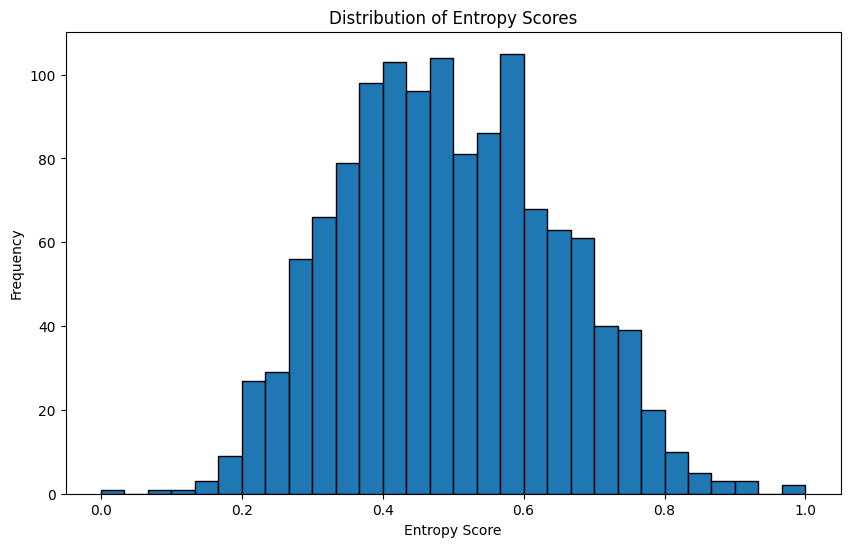


Entropy Score Statistics:
count    1259.000000
mean        0.494891
std         0.151461
min         0.000000
25%         0.381881
50%         0.486536
75%         0.598501
max         1.000000
Name: entropy_score, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, edgecolor='black')
plt.title('Distribution of Entropy Scores')
plt.xlabel('Entropy Score')
plt.ylabel('Frequency')
plt.show()

# Additional descriptive statistics
print("\nEntropy Score Statistics:")
print(y.describe())

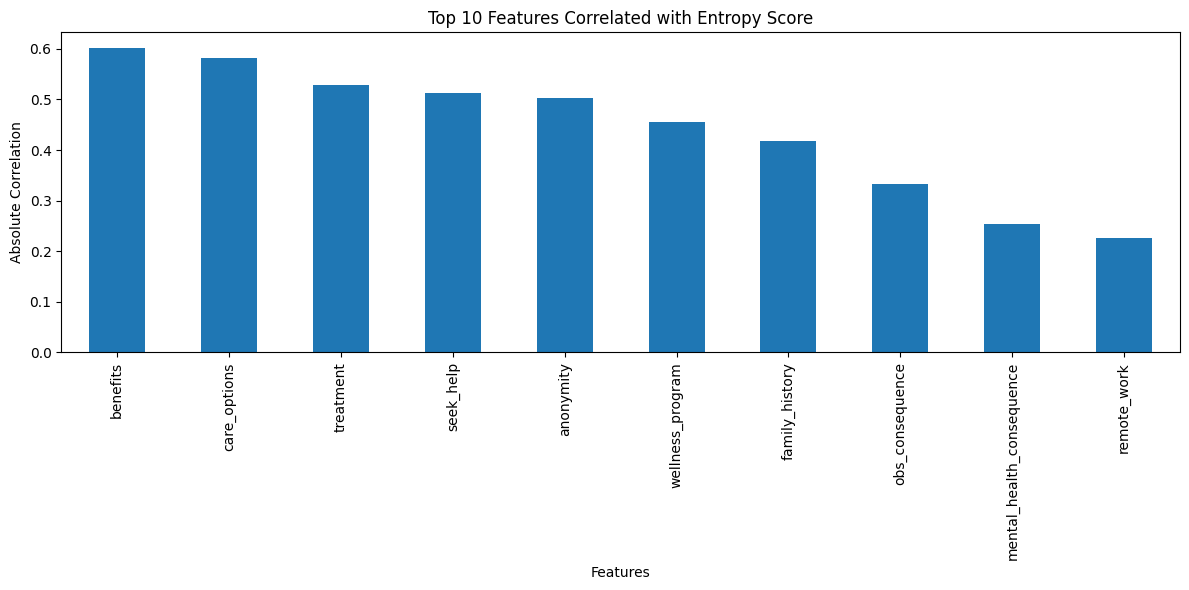

In [ ]:
def plot_feature_importance(X, y):
    # Calculate correlation with entropy score
    correlations = X.apply(lambda col: col.corr(y))

    # Sort correlations
    sorted_correlations = correlations.abs().sort_values(ascending=False)

    # Plot top 10 features
    plt.figure(figsize=(12, 6))
    sorted_correlations[:10].plot(kind='bar')
    plt.title('Top 10 Features Correlated with Entropy Score')
    plt.xlabel('Features')
    plt.ylabel('Absolute Correlation')
    plt.tight_layout()
    plt.show()

# Plot feature importances
plot_feature_importance(X_train, y_train)

In [ ]:
import os
from google.colab import userdata

# Note: userdata.get() returns None if the secret is not found.
# Kaggle API credentials are required.
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

# Check if credentials were loaded
if os.environ["KAGGLE_USERNAME"] is None or os.environ["KAGGLE_KEY"] is None:
  print("Warning: Kaggle credentials not found in Colab Secrets. Please add KAGGLE_USERNAME and KAGGLE_KEY.")
else:
  print("Kaggle credentials loaded.")

Kaggle credentials loaded.


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import os # Make sure os is imported if you check environment variables

# --- This filename is confirmed by your list ---
file_path = "train.csv"
# ---------------------------------------------

# Ensure credentials are set (from previous setup steps) before running this
if os.environ.get("KAGGLE_USERNAME") and os.environ.get("KAGGLE_KEY"):
  try:
    # Load the latest version using the verified file path
    print(f"Attempting to load: {file_path}")

    # CORRECTED CALL: Pass file_path as the third positional argument
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS, # 1st argument: Adapter type
        "blurredmachine/are-your-employees-burning-out", # 2nd argument: Dataset handle
        file_path # 3rd argument: The specific file within the dataset
        # Removed 'file_path=' keyword
    )

    print(f"Successfully loaded '{file_path}'")
    print("First 5 records:", df.head())
    print("\nDataset Info:")
    df.info() # Good practice to check columns and data types

  except Exception as e:
    print(f"An error occurred: {e}")
    print("Please double-check:")
    print("1. Your Kaggle credentials are correctly set up in Colab Secrets.")
    print(f"2. The file name '{file_path}' exists in the dataset 'blurredmachine/are-your-employees-burning-out'.")
    print("3. You have accepted any terms for the dataset on the Kaggle website if required.")
    # Add a hint about potential library version issues if the error persists
    print("4. Ensure you have the latest version of kagglehub (`pip install --upgrade kagglehub`).")


else:
  print("Kaggle credentials not loaded. Please complete the authentication steps.")

Attempting to load: train.csv


<ipython-input-5-cf530d23440b>:17: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 289k/289k [00:00<00:00, 470kB/s]

Extracting zip of train.csv...
Successfully loaded 'train.csv'
First 5 records:                 Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No          2.0                  3.0                   3.8   
1                 Yes          1.0                  2.0                   5.0   
2                 Yes          2.0                  NaN                   5.8   
3                 Yes          1.0                  1.0                   2.6   
4                  No          3.0                  7.0                   6.9   

   Burn Rate  
0       0